In [282]:
import pandas as pd
import matplotlib.pyplot as plt

In [283]:
parse_dates = ['table_created','table_modified']

In [284]:
df = pd.read_csv("/home/krishna/projects/lineage/data/fh_big_query_data.csv",parse_dates=parse_dates)

In [285]:
df.head(2)

,dataset_description,dataset_id,project_id,table_columns,table_created,table_description,table_id,table_modified,table_num_bytes,table_num_rows,table_partitioning_type,table_type
0,NaN,bigdataspain,fh-bigquery,"['transaction', 'frm_amount', 'to_amount', 'ti...",2013-11-07 18:50:43,NaN,aggr_transaction_clean,2013-11-07 18:50:43,630730636,3846825,NaN,TABLE
1,NaN,bigdataspain,fh-bigquery,"['transaction', 'frm_amount', 'to_amount', 'ti...",2013-11-07 17:58:36,NaN,aggr_transactions,2013-11-07 18:04:12,696837724,4249917,NaN,TABLE


In [286]:
df = df[["dataset_id","table_columns","table_created","table_id","table_modified","table_num_bytes","table_num_rows","table_type"]]

In [287]:
df.table_type.unique()

array(['TABLE', 'VIEW', 'EXTERNAL'], dtype=object)

In [288]:
df = df[df.dataset_id!= "public_dump"]

In [289]:
df.shape

(1088, 8)

In [290]:
df.dataset_id.unique().shape

(36,)

In [291]:
df["num_columns"] = df.apply(lambda x :len(x["table_columns"]),axis =1)

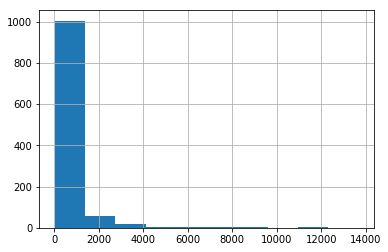

In [292]:
df.num_columns.hist()

In [293]:
df.num_columns.mean()

551.3180147058823

In [294]:
df.num_columns.min()

5

In [295]:
df.num_columns.max()

13690

In [188]:
# this is good from diversity of data. represents a normal bigdata landscape with lots of columns
# we have 36 lineages

In [46]:
# using Just timestamp information

In [296]:
start_date , end_date = df.table_created.min(), df.table_created.max()

In [297]:
start_date

Timestamp('2013-08-30 22:50:33')

In [298]:
end_date

Timestamp('2019-01-11 03:58:06')

In [299]:
def get_day_of_week(ts) : return ts.dayofweek
def get_day(ts) : return ts.day
def get_month(ts) : return ts.month
def get_year(ts) : return ts.year
def get_minutes(ts) : return ts.minute
def get_hour(ts) : return ts.hour
def get_delta(ts) : return ts - start_date

In [300]:
def get_num_days_since_start_date(ts):
    delta = get_delta(ts)
    return delta.days

In [301]:
def get_num_hours_since_start_date(ts):
    delta = get_delta(ts)
    return round(delta.total_seconds() / 3600)

In [302]:
def get_num_mins_since_start_date(ts):
    delta = get_delta(ts)
    return round(delta.total_seconds() / 60)

In [303]:
get_num_days_since_start_date(end_date)

1959

In [304]:
get_num_hours_since_start_date(end_date)

47021

In [305]:
get_num_mins_since_start_date(end_date)

2821268

In [306]:
def get_qhr(hour, minute) : return hour * 4 +  (minute // 15)

In [307]:
feature_df = df.copy()

In [308]:
feature_df.columns

Index(['dataset_id', 'table_columns', 'table_created', 'table_id',
       'table_modified', 'table_num_bytes', 'table_num_rows', 'table_type',
       'num_columns'],
      dtype='object')

In [309]:
feature_df.isnull().sum()

dataset_id         0
table_columns      0
table_created      0
table_id           0
table_modified     0
table_num_bytes    0
table_num_rows     0
table_type         0
num_columns        0
dtype: int64

In [310]:
feature_df["day_of_week"] = feature_df.table_created.apply(lambda x : get_day_of_week(x))
feature_df["day"] =  feature_df.table_created.apply(lambda x : get_day(x))
feature_df["month"] = feature_df.table_created.apply(lambda x : get_month(x))
feature_df["year"] = feature_df.table_created.apply(lambda x : get_year(x))
feature_df["minute"] = feature_df.table_created.apply(lambda x : get_minutes(x))
feature_df["hour"] = feature_df.table_created.apply(lambda x : get_hour(x))
feature_df["qhr"] = feature_df.apply(lambda x : get_qhr(x["hour"],x["minute"]),axis =1)

In [311]:
feature_df.columns

Index(['dataset_id', 'table_columns', 'table_created', 'table_id',
       'table_modified', 'table_num_bytes', 'table_num_rows', 'table_type',
       'num_columns', 'day_of_week', 'day', 'month', 'year', 'minute', 'hour',
       'qhr'],
      dtype='object')

In [312]:
cols_to_drop = ['dataset_id', 'table_columns', 'table_id',
       'table_modified', 'table_num_bytes', 'table_type']

In [313]:
feature_df.drop(columns=cols_to_drop,inplace=True)

In [314]:
feature_df.head(3)

,table_created,table_num_rows,num_columns,day_of_week,day,month,year,minute,hour,qhr
0,2013-11-07 18:50:43,3846825,66,3,7,11,2013,50,18,75
1,2013-11-07 17:58:36,4249917,66,3,7,11,2013,58,17,71
2,2013-11-07 18:13:35,4249917,66,3,7,11,2013,13,18,72


In [315]:
feature_df["num_days_since_start"] = feature_df.table_created.apply(lambda x : get_num_days_since_start_date(x))
feature_df["num_hours_since_start"] = feature_df.table_created.apply(lambda x : get_num_hours_since_start_date(x))
feature_df["num_mins_since_start"] = feature_df.table_created.apply(lambda x : get_num_mins_since_start_date(x))

In [316]:
cols_to_drop += ["table_created"]

In [317]:
feature_df.drop(columns=["table_created"],inplace=True)

In [244]:
feature_df.drop(columns=["table_num_rows"],inplace=True)

In [226]:
feature_df.drop(columns=["day_of_week","day","month","year","minute","hour","qhr"],inplace=True)

In [258]:
df.head(2)

,dataset_id,table_columns,table_created,table_id,table_modified,table_num_bytes,table_num_rows,table_type,num_columns
0,bigdataspain,"['transaction', 'frm_amount', 'to_amount', 'ti...",2013-11-07 18:50:43,aggr_transaction_clean,2013-11-07 18:50:43,630730636,3846825,TABLE,66
1,bigdataspain,"['transaction', 'frm_amount', 'to_amount', 'ti...",2013-11-07 17:58:36,aggr_transactions,2013-11-07 18:04:12,696837724,4249917,TABLE,66


In [262]:
df[df.dataset_id == "dbpedia2014temp"]

,dataset_id,table_columns,table_created,table_id,table_modified,table_num_bytes,table_num_rows,table_type,num_columns
17,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:45:01,AcademicJournal,2015-01-21 07:45:01,12143506,5678,TABLE,696
18,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:50:21,Activity,2015-01-21 07:50:21,3023868,1629,TABLE,633
19,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:52:21,Actor,2015-01-21 07:52:21,19115916,6501,TABLE,1517
20,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:51:53,AdministrativeRegion,2015-01-21 07:51:53,70336117,21702,TABLE,2847
21,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:53:05,AdultActor,2015-01-21 07:53:05,4517773,1497,TABLE,761
22,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:43:23,Aircraft,2015-01-21 07:43:23,13710758,9720,TABLE,766
23,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:48:55,Airline,2015-01-21 07:48:55,9590314,3387,TABLE,1106
24,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:46:46,Airport,2015-01-21 07:46:46,31847784,13695,TABLE,789
25,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:44:39,Album,2015-01-21 07:44:39,398611940,123803,TABLE,3922
26,dbpedia2014temp,"['URI', 'rdf_schema_label', 'rdf_schema_commen...",2015-01-21 07:46:00,AmateurBoxer,2015-01-21 07:46:00,1088262,407,TABLE,469


In [278]:
feature_df["lineage"] = df.dataset_id

In [279]:
feature_df["table_name"] = df.table_id

In [280]:
feature_df["cluster_labels"] = cluster.labels_

In [281]:
feature_df.to_csv("sample_data.csv",index=False)

In [264]:
feature_df.head(2)

,num_columns,num_days_since_start,num_hours_since_start,num_mins_since_start,lineage,table_name
0,66,68,1652,99120,bigdataspain,aggr_transaction_clean
1,66,68,1651,99068,bigdataspain,aggr_transactions


In [266]:
feature_df.drop(columns=["num_columns","lineage","table_name"],inplace=True)

In [318]:
from sklearn.decomposition import PCA

In [326]:
feature_df.drop(columns=["table_num_rows"],inplace=True)

In [327]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start
0,66,3,7,11,2013,50,18,75,68,1652,99120
1,66,3,7,11,2013,58,17,71,68,1651,99068


In [328]:
pca = PCA(n_components=2)

In [329]:
pca_X = pca.fit_transform(feature_df.values)

In [330]:
pca_X

array([[-1.08847185e+06, -7.92938951e+02],
       [-1.08852385e+06, -7.92933489e+02],
       [-1.08850886e+06, -7.93009459e+02],
       ...,
       [ 1.35177650e+06, -1.31273737e+02],
       [ 1.39930511e+06, -1.17978167e+02],
       [ 1.40354764e+06,  1.14305559e+02]])

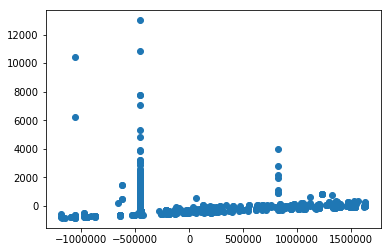

In [331]:
plt.scatter(pca_X[:, 0], pca_X[:, 1])

In [ ]:
feature_df.drop(col)

In [245]:
from sklearn.cluster import KMeans

In [246]:
from sklearn.preprocessing import StandardScaler

In [251]:
X = feature_df.values

In [252]:
scaled_X = StandardScaler().fit_transform(X)

/home/krishna/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/krishna/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [276]:
cluster = KMeans(n_clusters=23).fit(pca_X)

In [277]:
cluster.labels_

array([13, 13, 13, ...,  4,  4,  4], dtype=int32)

In [168]:
df[df.dataset_id == "public_dump"].shape

(76, 9)

In [239]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [332]:
sum_squared_distance = []
num_clusters = [_ for _ in range(2,40)]
for k in num_clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_X)
    cluster_labels = km.fit_predict(pca_X)
    silhouette_avg = silhouette_score(pca_X, cluster_labels)
    sum_squared_distance.append(km.inertia_)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7759260517366795
For n_clusters = 3 The average silhouette_score is : 0.7495423841286066
For n_clusters = 4 The average silhouette_score is : 0.7985499615183606
For n_clusters = 5 The average silhouette_score is : 0.7972147005668129
For n_clusters = 6 The average silhouette_score is : 0.8080600259157689
For n_clusters = 7 The average silhouette_score is : 0.7989735659317587
For n_clusters = 8 The average silhouette_score is : 0.8010607360095913
For n_clusters = 9 The average silhouette_score is : 0.8114485460794221
For n_clusters = 10 The average silhouette_score is : 0.81581029830001
For n_clusters = 11 The average silhouette_score is : 0.8172097159552407
For n_clusters = 12 The average silhouette_score is : 0.8173809257739733
For n_clusters = 13 The average silhouette_score is : 0.8221798482532289
For n_clusters = 14 The average silhouette_score is : 0.8239299866470675
For n_clusters = 15 The average silhouette_score is : 0.83503

In [333]:
kmeans = KMeans(n_clusters=23)
kmeans.fit(pca_X)
y_kmeans = kmeans.predict(pca_X)

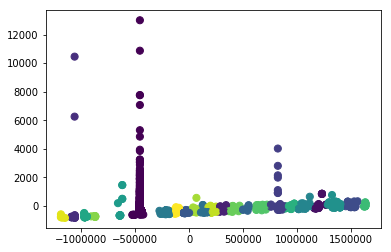

In [335]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=y_kmeans, s=50, cmap='viridis')



In [273]:
sum_squared_distance = []
num_clusters = [_ for _ in range(2,40)]
for k in num_clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_X)
    cluster_labels = km.fit_predict(pca_X)
    silhouette_avg = silhouette_score(pca_X, cluster_labels)
    sum_squared_distance.append(km.inertia_)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7760627612543687
For n_clusters = 3 The average silhouette_score is : 0.7499763012679149
For n_clusters = 4 The average silhouette_score is : 0.7990872565527362
For n_clusters = 5 The average silhouette_score is : 0.7977562296550005
For n_clusters = 6 The average silhouette_score is : 0.8088849011532285
For n_clusters = 7 The average silhouette_score is : 0.8024990185596321
For n_clusters = 8 The average silhouette_score is : 0.8019083778517014
For n_clusters = 9 The average silhouette_score is : 0.8123013730978144
For n_clusters = 10 The average silhouette_score is : 0.8131497033907654
For n_clusters = 11 The average silhouette_score is : 0.8185692842273506
For n_clusters = 12 The average silhouette_score is : 0.8181028476046563
For n_clusters = 13 The average silhouette_score is : 0.8240616953625496
For n_clusters = 14 The average silhouette_score is : 0.8258306897794128
For n_clusters = 15 The average silhouette_score is : 0.834

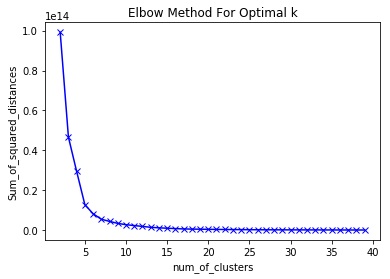

In [336]:
plt.plot(num_clusters, sum_squared_distance, 'bx-')
plt.xlabel('num_of_clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [166]:
df.dataset_id.unique().tolist()

['bigdataspain',
 'censo_chile',
 'dbpedia',
 'dbpedia2014temp',
 'fivethirtyeight_uber',
 'freebase20140119',
 'geocode',
 'ghtorrent',
 'github_extracts',
 'hackernews',
 'leadahq_challenge',
 'liquor',
 'mexico',
 'mta_nyc_si',
 'nyc',
 'openlibrary',
 'opensecrets',
 'popular_names',
 'public_dump',
 'pypi',
 'python_extracts',
 'reddit',
 'reddit_comments',
 'reddit_extracts',
 'reddit_posts',
 'reddit_v2',
 'sheets',
 'stackoverflow',
 'stackoverflow_archive',
 'test_acousticbrainz',
 'weather_gsod',
 'wikidata',
 'wikipedia',
 'wikipedia_extracts',
 'wikipedia_v2',
 'wikipedia_v3',
 'wikipedia_vt']

In [337]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start
0,66,3,7,11,2013,50,18,75,68,1652,99120
1,66,3,7,11,2013,58,17,71,68,1651,99068


In [339]:
df.head(2)

,dataset_id,table_columns,table_created,table_id,table_modified,table_num_bytes,table_num_rows,table_type,num_columns
0,bigdataspain,"['transaction', 'frm_amount', 'to_amount', 'ti...",2013-11-07 18:50:43,aggr_transaction_clean,2013-11-07 18:50:43,630730636,3846825,TABLE,66
1,bigdataspain,"['transaction', 'frm_amount', 'to_amount', 'ti...",2013-11-07 17:58:36,aggr_transactions,2013-11-07 18:04:12,696837724,4249917,TABLE,66


In [340]:
feature_df["col_names"] = df.table_columns

In [353]:
feature_df["cols"] = feature_df.apply(lambda x : " ".join(ast.literal_eval(x["col_names"])),axis =1)

In [354]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start,col_names,cols
0,66,3,7,11,2013,50,18,75,68,1652,99120,"['transaction', 'frm_amount', 'to_amount', 'ti...",transaction frm_amount to_amount time block hsh
1,66,3,7,11,2013,58,17,71,68,1651,99068,"['transaction', 'frm_amount', 'to_amount', 'ti...",transaction frm_amount to_amount time block hsh


In [343]:
from sklearn.feature_extraction.text import CountVectorizer

In [344]:
vectorizer = CountVectorizer()

In [355]:
vectorizer.fit(feature_df.cols)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [357]:
len(vectorizer.get_feature_names())

3811

In [366]:
cols_df = pd.DataFrame(vectorizer.transform(feature_df.cols).toarray(),columns=vectorizer.get_feature_names())

In [367]:
cols_df.head(2)

,_22_rdf_syntax_ns_type,_22_rdf_syntax_ns_type_label,a_authors,a_title,abbreviation,about_me,absolutemagnitude,academicadvisor,academicadvisor_label,academicdiscipline,...,yearofconstruction,yearofelectrification,years,yearscodedjob,yearscodedjobpast,yearsprogram,youthwing,youthwing_label,zip,zipcode
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [368]:
feature_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,num_mins_since_start,col_names,cols
0,66,3,7,11,2013,50,18,75,68,1652,99120,"['transaction', 'frm_amount', 'to_amount', 'ti...",transaction frm_amount to_amount time block hsh
1,66,3,7,11,2013,58,17,71,68,1651,99068,"['transaction', 'frm_amount', 'to_amount', 'ti...",transaction frm_amount to_amount time block hsh


In [369]:
feature_df.drop(columns=["col_names","cols"],inplace=True)

In [373]:
fin_df = pd.concat([feature_df,cols_df],axis =1)

In [374]:
fin_df.head(2)

,num_columns,day_of_week,day,month,year,minute,hour,qhr,num_days_since_start,num_hours_since_start,...,yearofconstruction,yearofelectrification,years,yearscodedjob,yearscodedjobpast,yearsprogram,youthwing,youthwing_label,zip,zipcode
0,66.0,3.0,7.0,11.0,2013.0,50.0,18.0,75.0,68.0,1652.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,66.0,3.0,7.0,11.0,2013.0,58.0,17.0,71.0,68.0,1651.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [378]:
fin_df.dropna(inplace=True)

In [379]:
fin_df.shape

(1012, 3822)

In [383]:
pca = PCA(n_components=50)

In [384]:
pca_X2 = pca.fit_transform(fin_df.values)

In [387]:
sum_squared_distance = []
num_clusters = [_ for _ in range(2,40)]
for k in num_clusters:
    km = KMeans(n_clusters=k)
    cluster_labels = km.fit_predict(fin_df.values)
    silhouette_avg = silhouette_score(fin_df.values, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7890970362901943
For n_clusters = 3 The average silhouette_score is : 0.7597990685209792
For n_clusters = 4 The average silhouette_score is : 0.805474015113027
For n_clusters = 5 The average silhouette_score is : 0.806109588834138
For n_clusters = 6 The average silhouette_score is : 0.8191886019442011
For n_clusters = 7 The average silhouette_score is : 0.8120925219915814
For n_clusters = 8 The average silhouette_score is : 0.8132892333088321
For n_clusters = 9 The average silhouette_score is : 0.8195109707569456
For n_clusters = 10 The average silhouette_score is : 0.8227571417953642
For n_clusters = 11 The average silhouette_score is : 0.8138300801046046
For n_clusters = 12 The average silhouette_score is : 0.8287748497018451
For n_clusters = 13 The average silhouette_score is : 0.8287276761580579
For n_clusters = 14 The average silhouette_score is : 0.8310166222740158
For n_clusters = 15 The average silhouette_score is : 0.84087

In [385]:
sum_squared_distance = []
num_clusters = [_ for _ in range(2,40)]
for k in num_clusters:
    km = KMeans(n_clusters=k)
    cluster_labels = km.fit_predict(pca_X)
    silhouette_avg = silhouette_score(pca_X, cluster_labels)
    sum_squared_distance.append(km.inertia_)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.7759260517366795
For n_clusters = 3 The average silhouette_score is : 0.7495423841286066
For n_clusters = 4 The average silhouette_score is : 0.7985499615183606
For n_clusters = 5 The average silhouette_score is : 0.7972147005668129
For n_clusters = 6 The average silhouette_score is : 0.8080600259157689
For n_clusters = 7 The average silhouette_score is : 0.8016653841618652
For n_clusters = 8 The average silhouette_score is : 0.7994392900085534
For n_clusters = 9 The average silhouette_score is : 0.812356460656667
For n_clusters = 10 The average silhouette_score is : 0.81581029830001
For n_clusters = 11 The average silhouette_score is : 0.8153938257108323
For n_clusters = 12 The average silhouette_score is : 0.815506195854703
For n_clusters = 13 The average silhouette_score is : 0.8203639580088204
For n_clusters = 14 The average silhouette_score is : 0.8259753077772932
For n_clusters = 15 The average silhouette_score is : 0.8321189

In [386]:
km = KMeans(n_clusters=23)

In [ ]:
km.fit_predict()